# L13 Lab Course

In our Simulations, we will solve Schroedinger's equation, which describes the
time evolution of a quantum mechanical state by multiplication with the
Hamilton operator:

\begin{equation}
i \hbar \partial_t \psi = H \psi
\end{equation}

Lets set $\hbar = 1$ for simplicity.
We can describe a system's evolution by its Hamilton operator.
For systems of small dimension it is more performant to store operators in a
dense format.

We split the Hamilton operator in a drift and a control part

\begin{align*}
H = H_d + H_c,
\end{align*}

where the latter can be written as sum weighted by control amplitudes

\begin{align*}
H_c = \sum_n u_n H_n.
\end{align*}

The drift Hamiltonian describes dynamics which we know about but cannot control,
while the control Hamiltonian describes the contributions which can be changed
dynamically to manipulate the qubit.

Lets consider a qubit under Rabi driving expressed as XY-control with the
Hamilton operator

\begin{align*}
H = \delta_\omega \sigma_z / 2 + A_x \sigma_x / 2
+ A_y \sigma_y / 2
\end{align*}

where $\delta_\omega$ is the frequency detuning and $A$ the driving amplitude.
Then we can split the Hamilton operator:

\begin{align*}
H_c &= A_x \sigma_x / 2 + A_y \sigma_y / 2 \\
H_d &= \delta_\omega \sigma_z / 2
\end{align*}

Total unitary of the evolution: 
[[ 0.70710678+0.j -0.70710678+0.j]
 [ 0.70710678+0.j  0.70710678+0.j]]


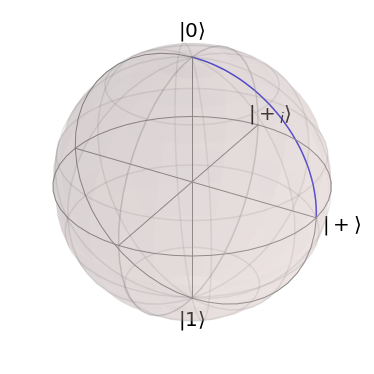

In [1]:
import numpy as np
from qopt import *


sigma_x = DenseOperator.pauli_x()
sigma_y = DenseOperator.pauli_y()
sigma_z = DenseOperator.pauli_z()

zero_matrix = 0 * sigma_x

# Set the detuning to zero, assuming resonant driving
delta_omega = 0

h_ctrl = [.5 * sigma_x, .5 * sigma_y]
h_drift = [delta_omega * .5 * sigma_z]

n_time_steps = 100
total_time = 50  # ns

time_steps = (total_time / n_time_steps) * np.ones((n_time_steps, ))

control_amplitudes = np.zeros((n_time_steps, len(h_ctrl)))
control_amplitudes[:, 1] = .005 * 2 * np.pi  # in 1/ns


solver = SchroedingerSolver(
    h_drift=h_drift * n_time_steps,
    h_ctrl=h_ctrl,
    tau=time_steps
)
solver.set_optimization_parameters(control_amplitudes)

print('Total unitary of the evolution: ')
print(solver.forward_propagators[-1].data)

solver.plot_bloch_sphere()

## Question: Which gate is implemented by this pulse?
Hints:
- Single qubit quantum gates usually are described as rotations on the
bloch sphere by the rotation axis and angle. For example a rotation around
the X Axis by the angle $\pi$ is called $X_{\pi}$ gate.

Answer:

## Task: Verify your answer with the entanglement fidelity
Hints:
- The cummulative propagators are stored in the solvers attribute
forward_propagators. solver.forward_propagator[i] is the propagator for the
evolution of the first i time steps.
- You can use the matrix exponential function of the DenseOperator class:
m.exp(tau) calculates exp(tau * m) for a DenseOperator m and a complex value tau
- You can use the entanglement fidelity implementation in qopt.cost_functions

In [2]:
# Solution:



## Task: Change the pulse to a $X_{\pi}$ gate

Hints:
- You just need to set the control amplitudes accordingly.
- Plot the resulting pulse on the Bloch sphere to see what exactly is happening.

In [3]:
# Solution


## Question: Is it possible to implement an arbitrary rotation?

In [4]:
# Answer:

## Task: If you answered yes: Implement a $Z_{\pi/2}$ gate

## Task: If not: Is this a problem for the manipulation of quantum information?

In [5]:
# Solution





